In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from glob import glob

file_name = "data\\xAPI-Edu-Data.csv"
file_name

'data\\xAPI-Edu-Data.csv'

In [3]:
df = pd.read_csv(file_name)

In [4]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [5]:
df.shape

(480, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

# Feature engineering

## 국적 변수 파생변수

In [7]:
# df.loc[df["PlaceofBirth"] == 'KuwaIT', "PlaceofBirth"] = 'KW'
# df["PlaceofBirth"].unique()

In [7]:
# set(df["NationalITy"].unique()) - set(df["PlaceofBirth"].unique())

In [8]:
# set(df["PlaceofBirth"].unique()) - set(df["NationalITy"].unique())

In [10]:
# df["immigration"] = df["NationalITy"]

In [11]:
# df.loc[df["NationalITy"] == df["PlaceofBirth"], "immigration"] = "N"
# df.loc[df["NationalITy"] != df["PlaceofBirth"], "immigration"] = "Y"
# df[["NationalITy","PlaceofBirth","immigration"]].sample(10)

## Class ordinary encoding

In [12]:
# Features = data.drop('Class',axis=1)
# Target = data['Class']
# label = LabelEncoder()
# Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
# for col in Cat_Colums:
#     Features[col] = label.fit_transform(Features[col])

In [9]:
df["Class"].unique()

array(['M', 'L', 'H'], dtype=object)

In [10]:
classid = {'M':1, 'L':0, 'H':2}
df["class_fill"] = df["Class"].copy()
df["class_fill"] = df["Class"].map(classid)
df[["Class", "class_fill"]].sample(10)

,Class,class_fill
402,H,2
260,L,0
197,H,2
38,L,0
207,M,1
112,L,0
437,M,1
292,H,2
230,M,1
79,H,2


# 원핫인코딩

In [11]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class', 'class_fill'],
      dtype='object')

In [12]:
df = df.drop(columns=['Class','NationalITy', 'PlaceofBirth', 'GradeID'])
df.head()

,gender,StageID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,class_fill
0,M,lowerlevel,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,1
1,M,lowerlevel,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,1
2,M,lowerlevel,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,0
3,M,lowerlevel,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,0
4,M,lowerlevel,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,1


In [13]:
df.columns

Index(['gender', 'StageID', 'SectionID', 'Topic', 'Semester', 'Relation',
       'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'class_fill'],
      dtype='object')

In [14]:
df = df.rename(columns={'class_fill':'Class'})
df.columns

Index(['gender', 'StageID', 'SectionID', 'Topic', 'Semester', 'Relation',
       'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [15]:
df.head()

,gender,StageID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,lowerlevel,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,1
1,M,lowerlevel,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,1
2,M,lowerlevel,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,0
3,M,lowerlevel,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,0
4,M,lowerlevel,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   StageID                   480 non-null    object
 2   SectionID                 480 non-null    object
 3   Topic                     480 non-null    object
 4   Semester                  480 non-null    object
 5   Relation                  480 non-null    object
 6   raisedhands               480 non-null    int64 
 7   VisITedResources          480 non-null    int64 
 8   AnnouncementsView         480 non-null    int64 
 9   Discussion                480 non-null    int64 
 10  ParentAnsweringSurvey     480 non-null    object
 11  ParentschoolSatisfaction  480 non-null    object
 12  StudentAbsenceDays        480 non-null    object
 13  Class                     480 non-null    int64 
dtypes: int64(5), object(9)
mem

In [17]:
df.columns

Index(['gender', 'StageID', 'SectionID', 'Topic', 'Semester', 'Relation',
       'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

# mod_df

In [46]:
#drop_first = True
mod_df = pd.get_dummies(df,drop_first = True)
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   raisedhands                    480 non-null    int64
 1   VisITedResources               480 non-null    int64
 2   AnnouncementsView              480 non-null    int64
 3   Discussion                     480 non-null    int64
 4   Class                          480 non-null    int64
 5   gender_M                       480 non-null    uint8
 6   StageID_MiddleSchool           480 non-null    uint8
 7   StageID_lowerlevel             480 non-null    uint8
 8   SectionID_B                    480 non-null    uint8
 9   SectionID_C                    480 non-null    uint8
 10  Topic_Biology                  480 non-null    uint8
 11  Topic_Chemistry                480 non-null    uint8
 12  Topic_English                  480 non-null    uint8
 13  Topic_French        

In [47]:
mod_df

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_M,StageID_MiddleSchool,StageID_lowerlevel,SectionID_B,SectionID_C,...,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,15,16,2,20,1,1,0,1,0,0,...,1,0,0,0,0,0,0,1,1,1
1,20,20,3,25,1,1,0,1,0,0,...,1,0,0,0,0,0,0,1,1,1
2,10,7,0,30,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,30,25,5,35,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,40,50,12,50,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,5,4,5,8,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
476,50,77,14,28,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
477,55,74,25,29,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
478,30,17,14,57,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# corr = mod_df.corr()
# mask = np.triu(np.ones_like(corr))

# plt.figure(figsize = (15,8))
# sns.heatmap(corr, cmap = "coolwarm", annot=True, mask = mask,fmt='.3f')

In [25]:
# class는 'raisedhands', 'VisITedResources', 'AnnouncementsView'와 중간정도의 양의 상관,  
#'StudentAbsenceDays_Under-7'와 중간정도의 음의 상관을 가진다

# 로지스틱 회귀

- 독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는 데 사용되는 통계 기법이다.

- 로지스틱 회귀의 목적은 일반적인 회귀 분석의 목표와 동일하게 종속 변수와 독립 변수간의 관계를 구체적인 함수로 나타내어 향후 예측 모델에 사용하는 것이다. 
    - 이는 독립 변수의 선형 결합으로 종속 변수를 설명한다는 관점에서는 선형 회귀 분석과 유사하다. 하지만 로지스틱 회귀는 선형 회귀 분석과는 다르게 종속 변수가 범주형 데이터를 대상으로 하며 입력 데이터가 주어졌을 때 해당 데이터의 결과가 특정 분류로 나뉘기 때문에 일종의 분류 (classification) 기법으로도 볼 수 있다.

- 회귀를 사용하여 데이터가 어떤 범주에 속할 확률을 0에서 1 사이의 값으로 예측하고 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류해주는 지도 학습 알고리즘
- 로지스틱 회귀 분석은 의료, 통신, 데이터마이닝과 같은 다양한 분야에서 분류 및 예측을 위한 모델로서 폭넓게 사용되고 있다.

## 스케일링: feature engineering(2)

_ https://notebook.community/kimkipyo/dss_git_kkp/%ED%86%B5%EA%B3%84,%20%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%20%EB%B3%B5%EC%8A%B5/160601%EC%88%98_11%EC%9D%BC%EC%B0%A8_%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%A0%84%EC%B2%98%EB%A6%AC%20Data%20Preprocessing,%20(%EA%B2%B0%EC%A0%95%EB%A1%A0%EC%A0%81)%EC%84%A0%ED%98%95%20%ED%9A%8C%EA%B7%80%20%EB%B6%84%EC%84%9D%20Linear%20Regression%20Analysis/1.Scikit-Learn%EC%9D%98%20%EC%A0%84%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EB%8A%A5

In [24]:
mod_df.columns

Index(['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',
       'Class', 'gender_M', 'StageID_MiddleSchool', 'StageID_lowerlevel',
       'SectionID_B', 'SectionID_C', 'Topic_Biology', 'Topic_Chemistry',
       'Topic_English', 'Topic_French', 'Topic_Geology', 'Topic_History',
       'Topic_IT', 'Topic_Math', 'Topic_Quran', 'Topic_Science',
       'Topic_Spanish', 'Semester_S', 'Relation_Mum',
       'ParentAnsweringSurvey_Yes', 'ParentschoolSatisfaction_Good',
       'StudentAbsenceDays_Under-7'],
      dtype='object')

In [48]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# mod_df['GradeID'] = preprocessing.scale(mod_df['GradeID'])
mod_df['raisedhands'] = preprocessing.scale(mod_df['raisedhands'])
mod_df['VisITedResources'] = preprocessing.scale(mod_df['VisITedResources'])
mod_df['AnnouncementsView'] = preprocessing.scale(mod_df['AnnouncementsView'])
mod_df['Discussion'] = preprocessing.scale(mod_df['Discussion'])

TypeError: 'StandardScaler' object is not callable

In [26]:
mod_df[['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']].sample(10)

,raisedhands,VisITedResources,AnnouncementsView,Discussion
231,-1.228569,-1.446426,-0.636438,-0.843326
85,-1.488756,-1.658255,-1.388784,-1.133087
67,0.592738,0.611341,-0.561203,1.329884
430,1.243205,1.034999,-0.598820,0.641701
112,-1.456233,-1.506949,-1.313549,0.243279
372,-1.196046,-1.053029,-0.598820,1.945626
376,-0.870813,1.065260,0.454464,0.641701
142,-1.196046,0.611341,0.642551,-1.169308
365,1.015541,0.460034,-0.260265,-0.517345
273,-0.805766,-1.053029,-1.200697,-0.626005


In [27]:
mod_df

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_M,StageID_MiddleSchool,StageID_lowerlevel,SectionID_B,SectionID_C,...,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,-1.033429,-1.174075,-1.351167,-0.843326,1,1,0,1,0,0,...,1,0,0,0,0,0,0,1,1,1
1,-0.870813,-1.053029,-1.313549,-0.662225,1,1,0,1,0,0,...,1,0,0,0,0,0,0,1,1,1
2,-1.196046,-1.446426,-1.426401,-0.481125,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,-0.545579,-0.901723,-1.238315,-0.300024,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,-0.220346,-0.145191,-0.974994,0.243279,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,-1.358663,-1.537210,-1.238315,-1.277968,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
476,0.104888,0.671863,-0.899759,-0.553565,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
477,0.267505,0.581080,-0.485969,-0.517345,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
478,-0.545579,-1.143813,-0.899759,0.496820,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   raisedhands                    480 non-null    float64
 1   VisITedResources               480 non-null    float64
 2   AnnouncementsView              480 non-null    float64
 3   Discussion                     480 non-null    float64
 4   Class                          480 non-null    int64  
 5   gender_M                       480 non-null    uint8  
 6   StageID_MiddleSchool           480 non-null    uint8  
 7   StageID_lowerlevel             480 non-null    uint8  
 8   SectionID_B                    480 non-null    uint8  
 9   SectionID_C                    480 non-null    uint8  
 10  Topic_Biology                  480 non-null    uint8  
 11  Topic_Chemistry                480 non-null    uint8  
 12  Topic_English                  480 non-null    uin

<AxesSubplot:>

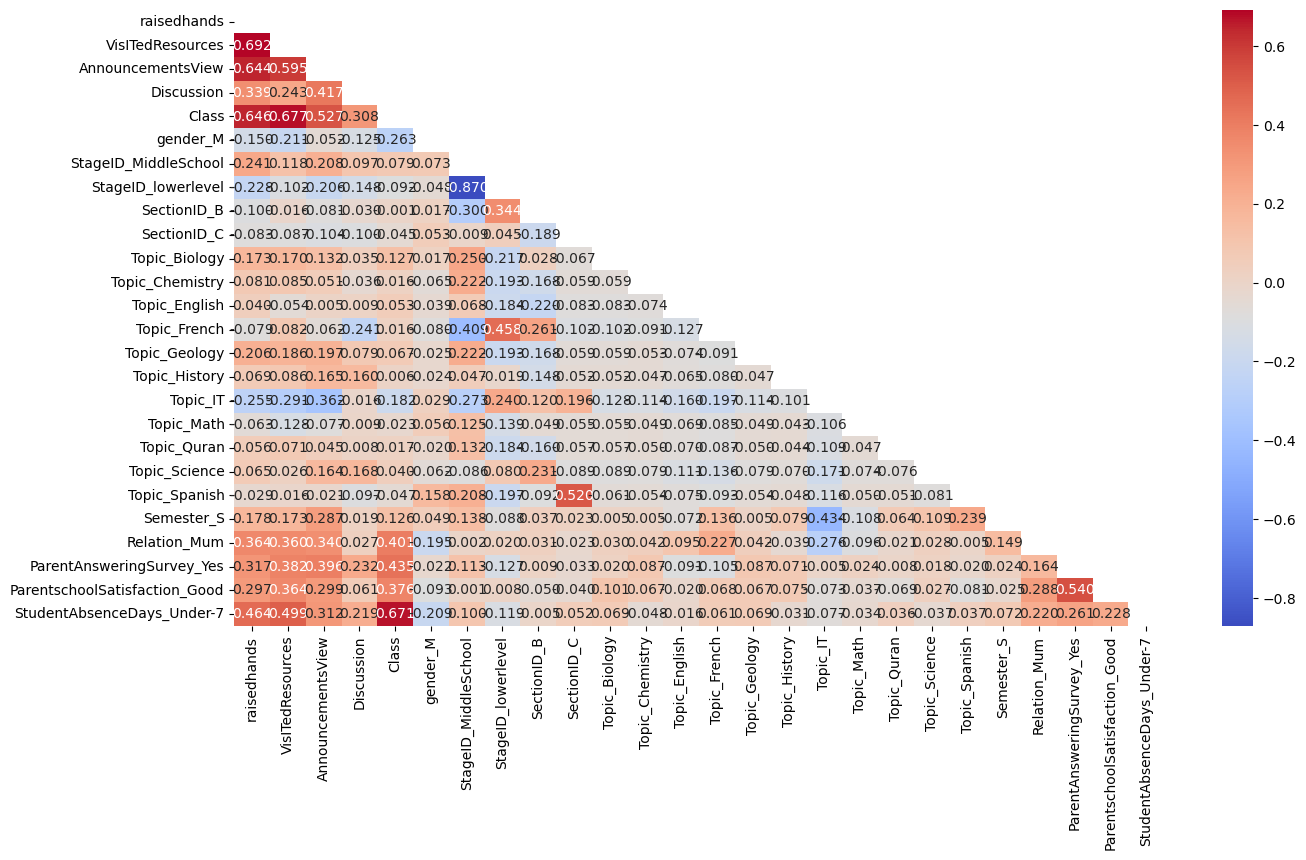

In [29]:
corr = mod_df.corr()
mask = np.triu(np.ones_like(corr))

plt.figure(figsize = (15,8))
sns.heatmap(corr, cmap = "coolwarm", annot=True, mask = mask,fmt='.3f')

## 모델링

### train/test  분류

In [30]:
label_name = "Class"
label_name

'Class'

In [31]:
feature_names = mod_df.columns.tolist()
feature_names.remove("Class")
feature_names

['raisedhands',
 'VisITedResources',
 'AnnouncementsView',
 'Discussion',
 'gender_M',
 'StageID_MiddleSchool',
 'StageID_lowerlevel',
 'SectionID_B',
 'SectionID_C',
 'Topic_Biology',
 'Topic_Chemistry',
 'Topic_English',
 'Topic_French',
 'Topic_Geology',
 'Topic_History',
 'Topic_IT',
 'Topic_Math',
 'Topic_Quran',
 'Topic_Science',
 'Topic_Spanish',
 'Semester_S',
 'Relation_Mum',
 'ParentAnsweringSurvey_Yes',
 'ParentschoolSatisfaction_Good',
 'StudentAbsenceDays_Under-7']

In [32]:
train = mod_df[feature_names]
train.shape

(480, 25)

In [33]:
train.head(2)

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,StageID_MiddleSchool,StageID_lowerlevel,SectionID_B,SectionID_C,Topic_Biology,...,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,-1.033429,-1.174075,-1.351167,-0.843326,1,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,1
1,-0.870813,-1.053029,-1.313549,-0.662225,1,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,1


In [34]:
test = mod_df[label_name]
test.shape

(480,)

In [35]:
test.head(2)

0    1
1    1
Name: Class, dtype: int64

### 학습/예측 데이터 셋 만들기

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [37]:
X_train, X_test, y_train, y_test = train_test_split(train, test, 
                                                    test_size=0.2,random_state=42)

In [38]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(384, 25) (96, 25) (384,) (96,)


In [39]:
print(X_train.isnull().sum().sum(), X_test.isnull().sum().sum(), 
      y_train.isnull().sum().sum(), y_test.isnull().sum().sum())

0 0 0 0


### 학습/예측하기: baseline

In [42]:
model = LogisticRegression(random_state=42)

In [43]:
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [44]:
y_predict = model.predict(X_test)

### 정확도평가

In [45]:
(y_test == y_predict).mean()

0.8541666666666666

In [46]:
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        26
           1       0.89      0.81      0.85        48
           2       0.81      0.77      0.79        22

    accuracy                           0.85        96
   macro avg       0.84      0.86      0.85        96
weighted avg       0.86      0.85      0.85        96



## 하이퍼파라미터튜닝

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* https://suy379.tistory.com/159
* https://velog.io/@sset2323/05-07.-%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1-%ED%9A%8C%EA%B7%80
* https://ysyblog.tistory.com/83
* https://m.blog.naver.com/gdpresent/221703566189

### GridSearchCV

In [40]:
model = LogisticRegression(random_state=42)

In [41]:
penalty = ['l1','l2']
c = [0.01, 0.1, 1, 1, 5, 10]
max_iter = list(range(100, 1100, 100))
# multi_class = {'auto', 'ovr', 'multinomial'}
solver = {'lbfgs', 'liblinear'}
n_jobs = [-1, 1]

In [42]:
params={'max_iter':max_iter,
        'C':c,
       'penalty':penalty,
#        'multi_class':multi_class,
#        'solver':solver,
       'n_jobs':n_jobs}
params

{'max_iter': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'C': [0.01, 0.1, 1, 1, 5, 10],
 'penalty': ['l1', 'l2'],
 'n_jobs': [-1, 1]}

In [43]:
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=5)
clf.fit(X_train, y_train)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(clf.best_params_, 
                                                  clf.best_score_))

KeyboardInterrupt: 

In [51]:
model = LogisticRegression(penalty = 'l2', 
                           C=1, 
                           max_iter = 100,
                           n_jobs=-1,
                           solver="lbfgs",
                           multi_class = "auto",
                          random_state=42)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
(y_test == y_predict).mean()

0.8541666666666666

# 랜덤포레스트

In [52]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=9, max_features=0.9, min_samples_leaf=3,
                       n_jobs=-1, random_state=42)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
(y_test == y_predict).mean()

0.8333333333333334

# KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(leaf_size=1, metric='manhattan', n_neighbors=8,
                     weights='distance')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
(y_test == y_predict).mean()

0.75

# 결정트리

In [54]:
from sklearn.tree import DecisionTreeClassifier
model =  DecisionTreeClassifier(max_depth= 5, 
                                max_features= 0.8, 
                                max_leaf_nodes= None, 
                                min_samples_leaf= 1, 
                                min_samples_split= 2)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
(y_test == y_predict).mean()

accuracy_score(y_test, y_predict)

0.8333333333333334

# xgboost

In [55]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(max_depth=10, n_estimators=200)
model_xgb.fit(X_train, y_train)

pred = model_xgb.predict(X_test)
print(classification_report(y_test,pred))

[23:04:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        26
           1       0.84      0.77      0.80        48
           2       0.74      0.77      0.76        22

    accuracy                           0.81        96
   macro avg       0.80      0.82      0.81        96
weighted avg       0.81      0.81      0.81        96

